1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
# Ex. 1.

class conv_num():
    """ - Use "dec_to_bin_hex(x,a)" function to convert a decimal number in binary (a=2) o hexadecimal (a=16)
    \n - Use bin_hex_to_dec(s,a) to convert binary (a=2) or hexadecimal (a=16) number in decimal number 
    \n - Use bin_to_hex(x,a,b) to convert binary in hexadecimal number (a=2,b=16) o hexadecimal in binary (a=16,b=2) 
    \n WARNING: binary and hexadecimal number must be written as lists"""
    
    def dec_to_bin_hex(x,a):
        s = []
        while x >= 1:
            s.append(x%a)
            x = x//a  
        s.reverse()
        s_corr = []
        for i in range(len(s)):
            if s[i] == 10:
                s_corr.append("a")
            elif s[i] == 11:
                s_corr.append("b")
            elif s[i] == 12:
                s_corr.append("c")
            elif s[i] == 13:
                s_corr.append("d")
            elif s[i] == 14:
                s_corr.append("e")
            elif s[i] == 15:
                s_corr.append("f")
            else: s_corr.append(s[i])
        return s_corr

    def convert(s):
        s_corr=[]
        for i in range(len(s)):
            if s[i] == "a":
                s_corr.append(10)
            elif s[i] == "b":
                s_corr.append(11)
            elif s[i] == "c":
                s_corr.append(12)
            elif s[i] == "d":
                s_corr.append(13)
            elif s[i] == "e":
                s_corr.append(14)
            elif s[i] == "f":
                s_corr.append(15)
            else: s_corr.append(s[i])
        return s_corr

    def bin_hex_to_dec(s,a):
        x = conv_num.convert(s)
        x.reverse()
        d = 0
        for i in range(len(x)):
            d += (x[i])*pow(a,i)
        return d

    def bin_to_hex(x,a,b):
        return conv_num.dec_to_bin_hex(conv_num.bin_hex_to_dec(x,a),b)

In [2]:
print(conv_num.__doc__)
print("\n")

a_dec=18
a_bin=conv_num.dec_to_bin_hex(a_dec,2)
a_hex=conv_num.dec_to_bin_hex(a_dec,16)

b_hex=[1,"e"]
b_dec=conv_num.bin_hex_to_dec(b_hex,16)
b_bin=conv_num.bin_to_hex(b_hex,16,2)

c_bin=[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
c_dec= conv_num.bin_hex_to_dec(c_bin,2)
c_hex=conv_num.bin_to_hex(c_bin,2,16)
    
print(a_dec, "->", a_bin, "->", a_hex, "\n", b_hex, "->", b_dec, "->", b_bin, "\n", c_bin, "->", c_dec, "->", c_hex)

 - Use "dec_to_bin_hex(x,a)" function to convert a decimal number in binary (a=2) o hexadecimal (a=16)
    
 - Use bin_hex_to_dec(s,a) to convert binary (a=2) or hexadecimal (a=16) number in decimal number 
    
 - Use bin_to_hex(x,a,b) to convert binary in hexadecimal number (a=2,b=16) o hexadecimal in binary (a=16,b=2) 
    


18 -> [1, 0, 0, 1, 0] -> [1, 2] 
 [1, 'e'] -> 30 -> [1, 1, 1, 1, 0] 
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] -> 2097152 -> [2, 0, 0, 0, 0, 0]


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [3]:
# Ex. 2.

a = "00111110001000000000000000000000"

def sing_prec_conv(a):
    if len(a)!=32:
        print("!!!ERROR!!!")
    exp=[0,0,0,0,0,0,0,0]
    for i in range(len(exp)):
        exp[i]=int(a[i+1])
    d=1
    for i in range(0,23):
        d+=(int(a[i+9]))*(2**(-i-1))
        
    exp_dec=conv_num.bin_hex_to_dec(exp,2)  

    return ((-1)**int(a[0]))*d*(2**(exp_dec-127))

print(sing_prec_conv(a))

0.15625


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [4]:
# Ex. 3

x = 1
while x < float('Inf'):
    if x*2 == float('Inf'):
        print(x)
    x *= 2.

x = 1
while x != 0:
    if x/2 == 0:
        print(x)
    x /= 2

8.98846567431158e+307
5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [5]:
# Ex. 4.

a=1
b=1.1
i=1

while a<b:
    b=1+(10**(-i))
    i+=1
    
print("The precision is ", "10^", -i+1)

The precision is  10^ -16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [6]:
# Ex. 5.

# (a)
def roots(a,b,c):    
    xp = (-b+((b*b-4*a*c)**(1/2)))/(2*a)
    xm = (-b-((b*b-4*a*c)**(1/2)))/(2*a)
    return (xp, xm)

# (b)
def roots_var(a,b,c):
    xp = (-2*c)/(-b+((b*b-4*a*c)**(1/2)))
    xm = (-2*c)/(-b-((b*b-4*a*c)**(1/2)))
    return (xp, xm)

# (c) 
def roots_var_stable(a,b,c): # Make it stable avoiding dangerous operation
    if (b**2 - 4*a*c) >= 0:
        xsum = -b/a
        xdiff = ((b**2 - 4*a*c)**(1/2))/(2*a)
        xp = (xsum + xdiff)/2
        xm = -(xsum - xdiff)/2
        return (xp,xm)
    else: print( 'Im')

a = 0.001
b = 1000
c = 0.001

print(roots(a,b,c))
print(roots_var(a,b,c))
print(roots_var_stable(a,b,c))

(-9.999894245993346e-07, -999999.999999)
(1000010.5755125057, 1.000000000001e-06)
(-250000.0000005, 749999.9999995)


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

[0.01, 0.0001, 1e-06, 1e-08, 1e-10, 1e-12, 1e-14]


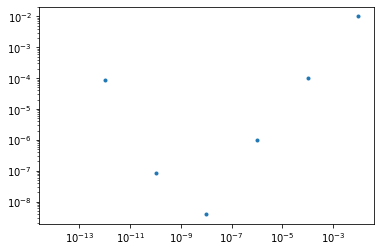

In [9]:
# Ex. 6.

import matplotlib.pyplot as plt 

# (a)

def f(x):
    return x*(x-1)

# First derivative
delta = (10**(-3))
point = 1

# (b)
con = []
exp = [-2,-4,-6,-8,-10,-12,-14]
delta = [10**i for i in exp]
print(delta)
for i in delta:
    con.append((((f(point+i)-f(point))/i)-1))

plt.plot(delta,con,'.')
plt.yscale("log")
plt.xscale("log")
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [8]:
# Ex. 7.

import math
import timeit 

# (a)

expected = math.pi/2

def integral(N):
    h = 2/N
    I = 0
    for i in range(N):
        I += math.sqrt(1-((h*((N/2)-i))**2))
    return h*I

I100 = integral(100)

print("The value of I with N =", 100, "is:", '%.6f' %I100)
print("The difference between calculated and expected value is:", '%.3f' %((100*abs(expected-I100))/expected),"%")
print("\n")

# (b)
N = 4*(10**6)

%timeit [integral(N)]

I1s = integral(N)
print("The value of I with N =", N, "is:", '%.6f' %I1s)
print("The difference between calculated and expected value is:", ((100*abs(expected-I1s))/expected),"%")
print("\n")

N = 3*(10**8)

%timeit [integral(N)]

I2s = integral(N)
print("The value of I with N =", N, "is:", '%.6f' %I2s)
print("The difference between calculated and expected value is:", ((100*abs(expected-I2s))/expected),"%")
print("\n")

The value of I with N = 100 is: 1.569134
The difference between calculated and expected value is: 0.106 %


1.14 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The value of I with N = 4000000 is: 1.570796
The difference between calculated and expected value is: 1.3235093770088998e-08 %




KeyboardInterrupt: 